# Multimodal Urban Livability Evaluation Dataset Showcase

This notebook demonstrates how to load and visualize datasets from Hugging Face.

## 🔐 Hugging Face Authentication (Required)

**Important**: This dataset requires Hugging Face authentication. Please login before loading the dataset.

### Method 1: Using Hugging Face CLI (Recommended)

Run the following commands in a terminal before starting Jupyter:

```bash
# Install huggingface_hub (if not already installed)
pip install huggingface_hub

# Login to Hugging Face
huggingface-cli login
```

When prompted, enter your Hugging Face token. You can get your token from:
- https://huggingface.co/settings/tokens

### Method 2: Set Token in Notebook

If you cannot use CLI login (e.g., on web platforms), run the cell below to set your token directly.

### Method 3: Pass Token Directly in Code

If the above methods don't work, you can pass the token directly when loading the dataset. Modify the `load_dataset` call in the code:

**Original code:**
```python
ds = load_dataset("Vinjou/Multimodal_urban_livability_evaluation_dataset")
```

**Modified code (with token):**
```python
ds = load_dataset("Vinjou/Multimodal_urban_livability_evaluation_dataset", token="your_token_here")
```

Replace `"your_token_here"` with your actual Hugging Face token.

In [ ]:
# Install huggingface_hub if not already installed
import subprocess
import sys

try:
    import huggingface_hub
    print("✓ huggingface_hub is already installed")
except ImportError:
    print("Installing huggingface_hub...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "huggingface_hub"])
    print("✓ huggingface_hub installed successfully")

# Check if already logged in
from huggingface_hub import HfFolder
token = HfFolder.get_token()

if token:
    print("✓ Hugging Face token found. You are already logged in.")
    print(f"  Token starts with: {token[:10]}...")
else:
    print("⚠️  No Hugging Face token found.")
    print("Please login using one of the following methods:")
    print("  1. Run in terminal: huggingface-cli login")
    print("  2. Or set token below:")
    print()
    print("# Uncomment and set your token:")
    print("# import os")
    print("# os.environ['HF_TOKEN'] = 'your_token_here'")

In [ ]:
!pip install datasets matplotlib pillow

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

# 1. 加载数据集
print("正在加载数据集...")

# Get token from environment variable or Hugging Face cache
try:
    from huggingface_hub import HfFolder
    token = os.environ.get("HF_TOKEN") or HfFolder.get_token()
    
    if not token:
        raise RuntimeError(
            "HF token missing. Please set HF_TOKEN environment variable or run huggingface-cli login.\n"
            "You can set it in a previous cell: os.environ['HF_TOKEN'] = 'your_token'"
        )
    
    # Load dataset with token
    ds = load_dataset("Vinjou/Multimodal_urban_livability_evaluation_dataset", token=token)
    print("加载成功！")
except Exception as e:
    error_msg = str(e)
    if "Unauthorized" in error_msg or "token" in error_msg.lower():
        print("❌ Authentication required to access the dataset.")
        print("Please set your Hugging Face token:")
        print("  1. In a previous cell, run: os.environ['HF_TOKEN'] = 'your_token'")
        print("  2. Or run: huggingface-cli login")
        print("  3. Or pass token directly: load_dataset(..., token='your_token')")
    raise

/u/wz53/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


正在加载数据集...


Generating test split: 100%|██████████| 13440/13440 [00:05<00:00, 2307.86 examples/s]


加载成功！


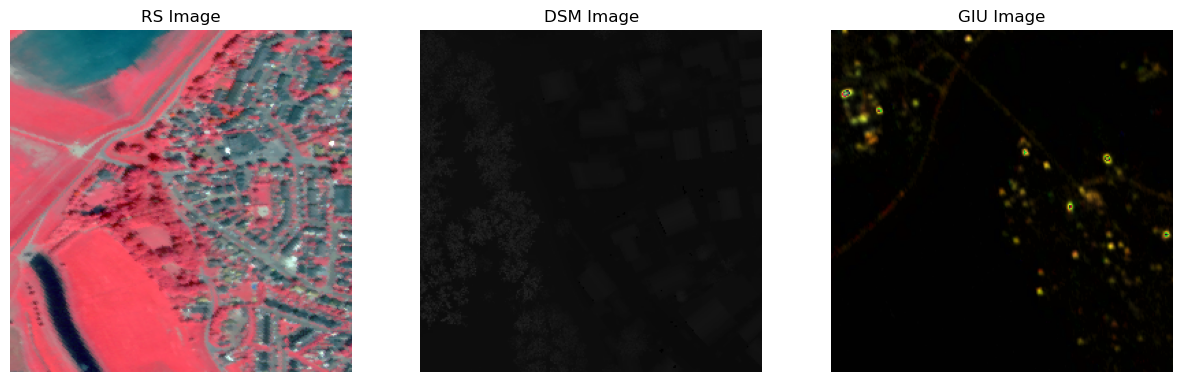

Text: Null
Livability Score (LBM): 4.2104


In [5]:
def show_data(split="train"):
    sample = random.choice(ds[split])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].imshow(sample["rs_image"])
    ax[0].set_title("RS Image")
    
    ax[1].imshow(sample["dsm_image"])
    ax[1].set_title("DSM Image")
    
    ax[2].imshow(sample["giu_image"])
    ax[2].set_title("GIU Image")
    
    for a in ax: a.axis("off")
    plt.show()
    
    print(f"Text: {sample['text']}")
    print(f"Livability Score (LBM): {sample['lbm']:.4f}")

show_data()